In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['font.size'] = 14

In [2]:
NFFT = 2**13
f0 = 8417e6
t0 = np.datetime64('2023-10-13T15:51:27.138273')
t1 = np.datetime64('2023-10-13T16:44:08.138817')
fs = 4.096e6
n_int = 1250
x0 = np.fromfile('/home/destevez/Psyche/waterfalls/Psyche_2023-10-13T15_51_16_0x', 'float32').reshape(-1, NFFT)
x1 = np.fromfile('/home/destevez/Psyche/waterfalls/Psyche_2023-10-13T16_43_57_0x', 'float32').reshape(-1, NFFT)
t0_dur = (x0.shape[0] * 1e9 * n_int * NFFT / fs) * np.timedelta64(1, 'ns')
dist = round((t1 - t0 - t0_dur)/np.timedelta64(1, 's')*fs/(NFFT * n_int))
x = np.empty((x0.shape[0] + dist + x1.shape[0], NFFT))
x[:] = 1
x[:x0.shape[0]] = x0
x[-x1.shape[0]:] = x1

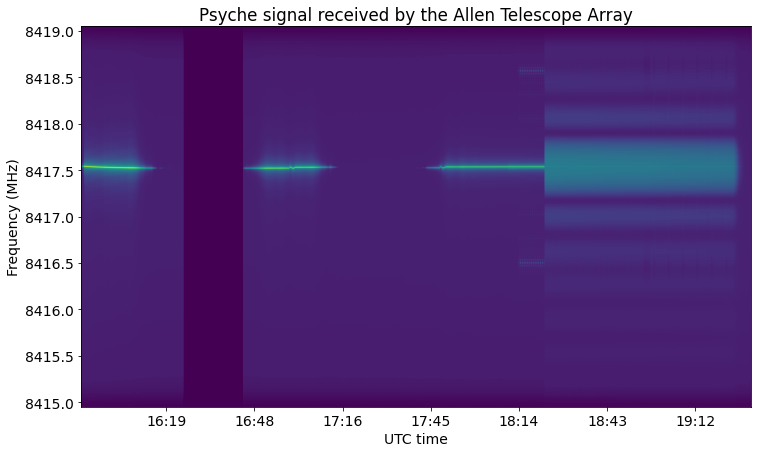

In [3]:
plt.figure(figsize=(12, 7))
a = mdates.date2num(t0)
b = mdates.date2num(t0 + (x.shape[0] * 1e9 * n_int * NFFT / fs) * np.timedelta64(1, 'ns'))
plt.imshow(10*np.log10(x).T[::-1], aspect='auto', extent=[a, b, 1e-6*(f0 - fs/2), 1e-6*(f0 + fs/2)],
           vmin=15, vmax=65)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('Frequency (MHz)')
plt.xlabel('UTC time')
plt.title('Psyche signal received by the Allen Telescope Array');

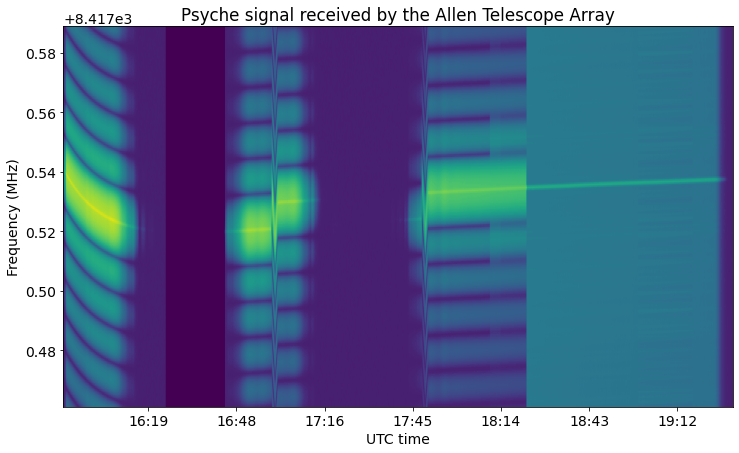

In [4]:
plt.figure(figsize=(12, 7))
a = mdates.date2num(t0)
b = mdates.date2num(t0 + (x.shape[0] * 1e9 * n_int * NFFT / fs) * np.timedelta64(1, 'ns'))
plt.imshow(10*np.log10(x).T[::-1], aspect='auto', extent=[a, b, 1e-6*(f0 - fs/2), 1e-6*(f0 + fs/2)],
           vmin=15, vmax=65)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylabel('Frequency (MHz)')
plt.xlabel('UTC time')
plt.title('Psyche signal received by the Allen Telescope Array')
plt.ylim(8417.525-64e-3, 8417.525+64e-3);

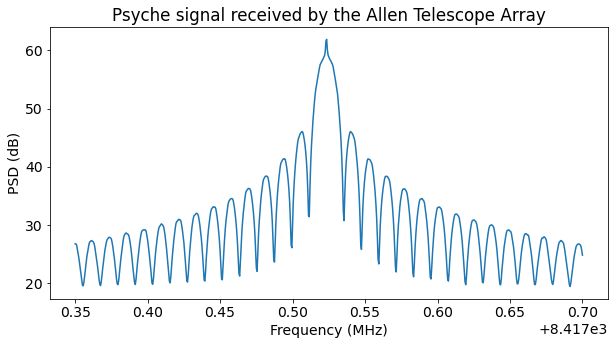

In [5]:
faxis = 1e-6 * (f0 + np.fft.fftshift(np.fft.fftfreq(NFFT, 1/fs)))
fsel = (faxis >= 8417.35) & (faxis <= 8417.7);
plt.plot(faxis[fsel], 10*np.log10(x0[x0.shape[0]//2, fsel]))
plt.title('Psyche signal received by the Allen Telescope Array')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dB)');

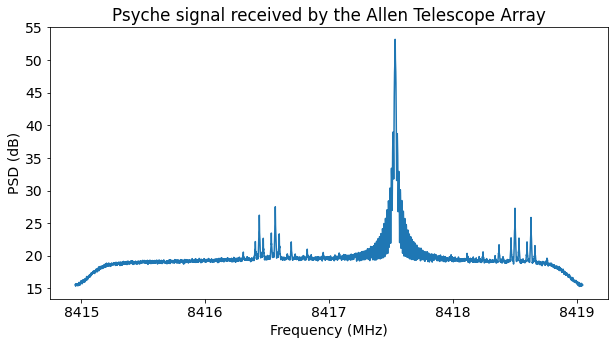

In [6]:
faxis = 1e-6 * (f0 + np.fft.fftshift(np.fft.fftfreq(NFFT, 1/fs)))
plt.plot(faxis, 10*np.log10(x1[9*x1.shape[0]//16]))
plt.title('Psyche signal received by the Allen Telescope Array')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dB)');

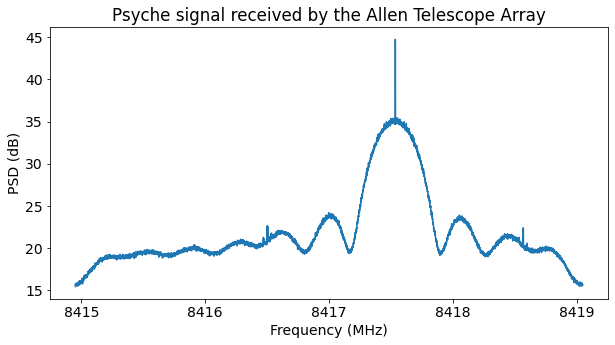

In [7]:
faxis = 1e-6 * (f0 + np.fft.fftshift(np.fft.fftfreq(NFFT, 1/fs)))
plt.plot(faxis, 10*np.log10(x1[3*x1.shape[0]//4]))
plt.title('Psyche signal received by the Allen Telescope Array')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dB)');